In [168]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rc
import platform

# 시스템에 따라 한글 폰트 설정
if platform.system() == "Darwin":  # macOS
    rc('font', family='AppleGothic')
elif platform.system() == "Windows":  # Windows
    rc('font', family='Malgun Gothic')
else:  # Linux (예: Ubuntu)
    rc('font', family='NanumGothic')

# 음수 값이 깨지는 현상 방지
plt.rcParams['axes.unicode_minus'] = False


# 국채 수익률 // 2024년 11월 13일 거래되는 3년짜리 국채수익률 가져옴.
rf = pd.read_csv ('../API/rf.csv') 
rf = rf['CLSPRC_YD'].mean()*0.01
print(rf)

# 시장수익률 //
Market_Return = pd.read_csv('../조재상/Market_Returns.csv')
Market_Return = Market_Return['Market_Returns'].mean()
Market_Return

0.02937


0.0043209876543210055

In [170]:
def plot_sml(stock_name, data, risk_free_rate=rf, market_return=Market_Return):
    """
    SML(Security Market Line)을 그리는 함수.
    
    Args:
        stock_name (str): 종목명 (ISU_NM).
        data (pd.DataFrame): 종목명과 베타 값이 포함된 데이터프레임.
        risk_free_rate (float): 무위험 수익률 (기본값: 3%).
        market_return (float): 시장의 기대 수익률 (기본값: 8%).
    """
    # 종목 데이터 필터링
    if stock_name not in data['ISU_NM'].values:
        print(f"종목명 {stock_name}이 데이터에 없습니다.")
        return

    stock_beta = data[data['ISU_NM'] == stock_name]['베타 값'].values[0]

    # SML 라인 정의
    beta_range = np.linspace(0, 2, 100)  # 베타 값 범위
    sml_returns = risk_free_rate + beta_range * (market_return - risk_free_rate)

    # 해당 종목의 예상 수익률
    stock_expected_return = risk_free_rate + stock_beta * (market_return - risk_free_rate)

    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(beta_range, sml_returns, label="SML (Security Market Line)", color='blue')
    plt.scatter(stock_beta, stock_expected_return, color='red', label=f"{stock_name} (Beta={stock_beta:.2f})")
    
    # 축, 제목 및 기타 설정
    plt.title(f"SML and Expected Return for {stock_name}", fontsize=14)
    plt.xlabel("Beta (β)", fontsize=12)
    plt.ylabel("Expected Return (%)", fontsize=12)
    plt.axhline(y=risk_free_rate, color='gray', linestyle='--', label=f"Risk-Free Rate ({risk_free_rate * 100:.2f}%)")
    plt.legend()
    plt.grid()
    plt.show()


In [172]:
selected_stock = pd.read_csv('today_beta.csv')
selected_stock

,BAS_DD,ISU_NM,ClosePrice,Stock_Returns,MKTCAP,LIST_SHRS,베타 값
0,2024-11-12,AJ네트웍스,4575,-1.72,207031372425,45252759,0.430027
1,2024-11-12,AK홀딩스,11790,-0.67,156188744190,13247561,0.407711
2,2024-11-12,BGF,3550,-0.70,339794608050,95716791,0.573290
3,2024-11-12,BGF리테일,107600,-0.09,1859748285600,17283906,0.115150
4,2024-11-12,BNK금융지주,9490,0.32,3040944539230,320436727,0.576934
...,...,...,...,...,...,...,...
954,2024-11-12,휴비스,2425,-4.90,83662500000,34500000,0.751359
955,2024-11-12,휴스틸,4060,-4.25,228123584500,56188075,0.864110
956,2024-11-12,흥국화재,3240,-4.28,208146169800,64242645,1.213117
957,2024-11-12,흥국화재우,4775,-4.50,3667200000,768000,0.840955


In [174]:

# Define the function to extract stock parameters
def get_stock_parameters(stock_name, data):
    """
    주어진 종목명과 데이터에서 베타 값 및 기타 정보를 반환하는 함수.

    Args:
        stock_name (str): 종목명 (ISU_NM).
        data (pd.DataFrame): 종목명과 관련 데이터가 포함된 데이터프레임.

    Returns:
        dict: 종목명, 베타 값 및 관련 정보를 포함하는 딕셔너리.
    """
    # 종목명이 데이터에 존재하는지 확인
    if stock_name not in data['ISU_NM'].values:
        return {"error": f"종목명 '{stock_name}'이 데이터에 없습니다."}
    
    # 해당 종목 필터링
    stock_data = data[data['ISU_NM'] == stock_name].iloc[0]
    
    # 관련 정보 추출
    beta_value = stock_data['베타 값']
    close_price = stock_data['ClosePrice']
    market_cap = stock_data['MKTCAP']
    shares_outstanding = stock_data['LIST_SHRS']
    
    # 딕셔너리 형태로 반환
    return {
        "종목명": stock_name,
        "베타 값": beta_value,
        "종가": close_price,
        "시가총액": market_cap,
        "발행주식수": shares_outstanding,
    }

# Example DataFrame (mock data based on the provided image)
data = pd.DataFrame({
    'BAS_DD': ['2024-11-12'] * 5,
    'ISU_NM': ['삼성전자', 'LG전자', 'SK하이닉스', 'NAVER', '카카오'],
    'ClosePrice': [70000, 90000, 105000, 250000, 120000],
    'Stock_Returns': [0.03, 0.025, 0.04, 0.02, 0.015],
    'MKTCAP': [350000000000, 150000000000, 250000000000, 300000000000, 200000000000],
    'LIST_SHRS': [50000000, 30000000, 40000000, 12000000, 20000000],
    '베타 값': [1.2, 0.8, 1.1, 1.3, 0.9]
})

# Function usage
stock_name = '삼성전자'
parameters = get_stock_parameters(stock_name, data)
parameters


{'종목명': '삼성전자',
 '베타 값': 1.2,
 '종가': 70000,
 '시가총액': 350000000000,
 '발행주식수': 50000000}

In [176]:
parameters = get_stock_parameters('삼성전자', selected_stock)
parameters

{'종목명': '삼성전자',
 '베타 값': 1.2366348183815103,
 '종가': 53000,
 '시가총액': 316398475150000,
 '발행주식수': 5969782550}

In [178]:
print(rf)
print(Market_Return)


0.02937
0.0043209876543210055


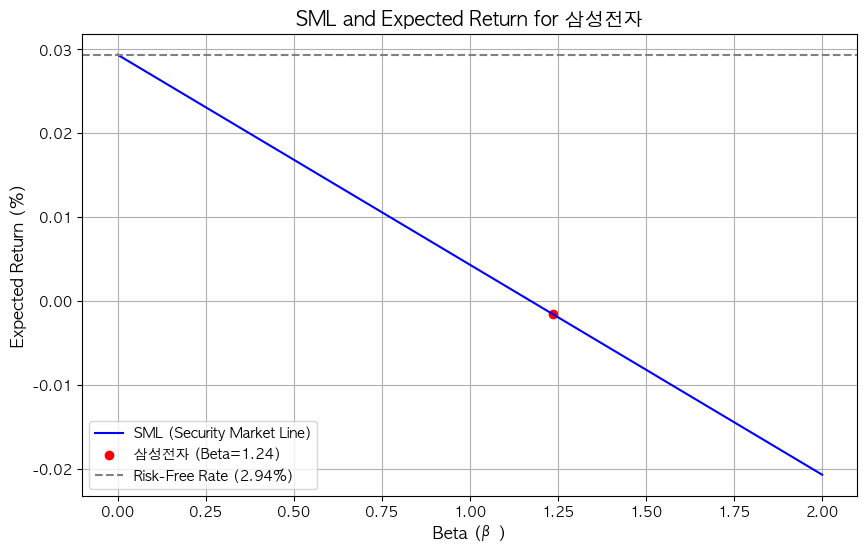

In [180]:
plot_sml('삼성전자', selected_stock, risk_free_rate=rf, market_return=Market_Return)

In [190]:

def predict_stock_price(stock_name, data, current_price_col='ClosePrice', beta_col='베타 값',
                        risk_free_rate=rf, market_return=Market_Return, trading_days=20):
    """
    1개월 후 주식 가격을 SML 기반으로 예측하는 함수.

    Args:
        stock_name (str): 종목명 (ISU_NM).
        data (pd.DataFrame): 종목명, 베타 값 및 현재 가격 등이 포함된 데이터프레임.
        current_price_col (str): 현재 주가 열 이름 (기본값: 'ClosePrice').
        beta_col (str): 베타 값 열 이름 (기본값: '베타 값').
        risk_free_rate (float): 무위험 수익률 (기본값: 3%).
        market_return (float): 시장의 기대 수익률 (기본값: 8%).
        trading_days (int): 예측 기간의 영업일 수 (기본값: 63, 약 3개월).

    Returns:
        float: 1개월 후 예상 주식 가격.
    """
    # Check if the stock exists in the data
    if stock_name not in data['ISU_NM'].values:
        return {"error": f"종목명 '{stock_name}'이 데이터에 없습니다."}

    # Get the stock data
    stock_data = data[data['ISU_NM'] == stock_name].iloc[0]
    current_price = stock_data[current_price_col]
    beta_value = stock_data[beta_col]

    # Calculate expected return using SML
    expected_return = risk_free_rate + beta_value * (market_return - risk_free_rate)

    # Calculate about 1 month (20 trading days) growth factor
    growth_factor = (1 + expected_return) ** (trading_days / 252)  # 252 영업일 기준 연율화

    # Predict future stock price
    predicted_price = current_price * growth_factor

    return {
        "종목명": stock_name,
        "현재 주가": current_price,
        "기대 수익률": expected_return,
        "1개월 후 예상 주가": predicted_price
    }


In [210]:
prediction = predict_stock_price(stock_name='삼성전자', data=selected_stock)
print(prediction)

{'종목명': '삼성전자', '현재 주가': 53000, '기대 수익률': -0.0016064808327349543, '1개월 후 예상 주가': 52993.237578426764}


In [216]:
def plot_dynamic_stock_price_projection_emphasized(stock_name, data, risk_free_rate, market_return, current_price_col='ClosePrice', beta_col='베타 값'):
    """
    베타 값을 기반으로 시간이 지남에 따라 변화하는 예상 주가를 시계열 그래프로 표시.
    작은 변화량을 강조하기 위해 Y축 범위를 조정.

    Args:
        stock_name (str): 종목명.
        data (pd.DataFrame): 종목명, 베타 값 및 현재 가격 등이 포함된 데이터프레임.
        risk_free_rate (float): 무위험 수익률.
        market_return (float): 시장의 기대 수익률.
        current_price_col (str): 현재 주가 열 이름.
        beta_col (str): 베타 값 열 이름.
    """
    # Check if the stock exists in the data
    if stock_name not in data['ISU_NM'].values:
        print(f"종목명 '{stock_name}'이 데이터에 없습니다.")
        return

    # Get stock data
    stock_data = data[data['ISU_NM'] == stock_name].iloc[0]
    current_price = stock_data[current_price_col]
    beta_value = stock_data[beta_col]

    # Calculate daily returns using SML
    expected_return = risk_free_rate + beta_value * (market_return - risk_free_rate)
    daily_return = (1 + expected_return) ** (1 / 252) - 1  # 일별 수익률 (252 영업일 기준)

    # Simulate price changes over 20 trading days
    trading_days = np.arange(1, 21)  # 20 trading days
    projected_prices = [current_price]  # 시작 가격
    for _ in trading_days[1:]:
        next_price = projected_prices[-1] * (1 + daily_return)
        projected_prices.append(next_price)

    # Adjust Y-axis range to emphasize small changes
    min_price = min(projected_prices) * 0.99  # 최소값의 99%
    max_price = max(projected_prices) * 1.01  # 최대값의 101%

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(trading_days, projected_prices, label=f"{stock_name} 예상 주가", marker='o', color='blue')
    plt.axhline(y=current_price, color='gray', linestyle='--', label=f"현재 주가: {current_price:,}원")
    plt.title(f"{stock_name} 1개월 예상 주가 변화 (베타 기반)", fontsize=14)
    plt.xlabel("거래일", fontsize=12)
    plt.ylabel(f"주가 (원)", fontsize=12)
    plt.ylim(min_price, max_price)  # Y축 범위 조정
    plt.legend()
    plt.grid()
    plt.show()

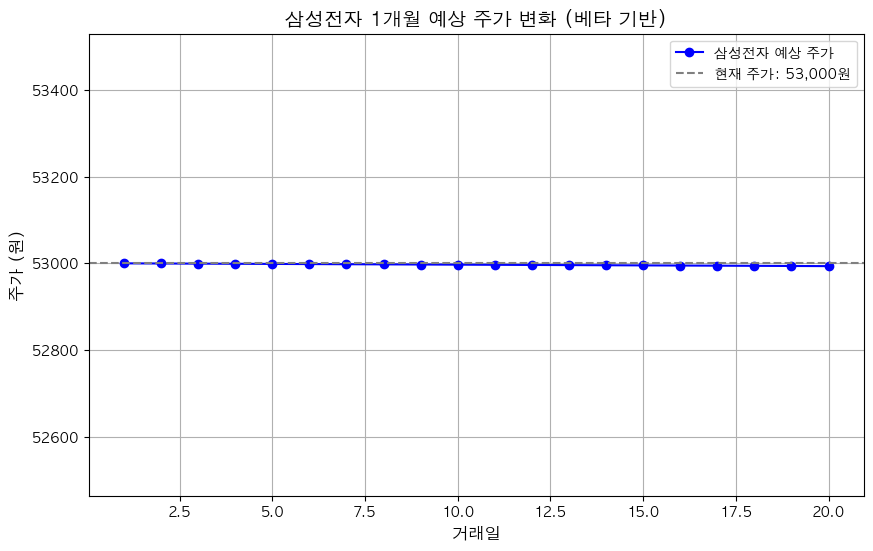

In [218]:
plot_dynamic_stock_price_projection_emphasized(
    stock_name='삼성전자',
    data=selected_stock,
    risk_free_rate=rf,  # 무위험 수익률
    market_return=Market_Return    # 시장 수익률
)
